In [1]:
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2
ansatz = TwoLocal(num_qubits, "ry", "cz")
optimizer = SLSQP(maxiter=1000)

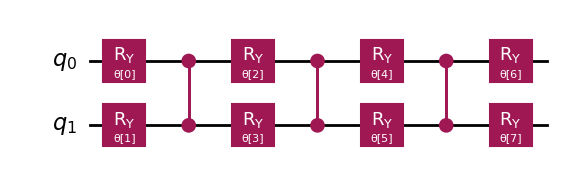

In [2]:
ansatz.decompose().draw("mpl", style="iqx")

In [3]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [4]:
from qiskit.algorithms.minimum_eigensolvers import VQE

vqe = VQE(estimator, ansatz, optimizer)

In [5]:
from qiskit.quantum_info import SparsePauliOp

H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156)
])

In [8]:
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 95,
    'eigenvalue': -1.857275029476464,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000001C5E36D0BB0>,
    'optimal_parameters': {   ParameterVectorElement(θ[1]): 3.642963444202598,
                              ParameterVectorElement(θ[0]): 5.6195738657551395,
                              ParameterVectorElement(θ[2]): -2.5415749363515365,
                              ParameterVectorElement(θ[3]): 3.9685063007443637,
                              ParameterVectorElement(θ[4]): -3.496375225269014,
                              ParameterVectorElement(θ[5]): -2.92868615854705,
                              ParameterVectorElement(θ[6]): -2.0685784559009166,
                              ParameterVectorElement(θ[7]): -1.9928102307766413},
    'optimal_point': array([ 5.61957387,  3.64296344, -2.54157494,  3.9685063 , -3.49637523,
       -2.92868616, -2.06857846, -1.99281023]),
    'o

In [9]:
from qiskit.algorithms.optimizers import SPSA

estimator = Estimator(options={"shots": 1000})

vqe.estimator = estimator
vqe.optimizer = SPSA(maxiter=100)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -1.8574532974510636,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000001C5E37BDD90>,
    'optimal_parameters': {   ParameterVectorElement(θ[1]): 5.301602972868415,
                              ParameterVectorElement(θ[0]): -0.6023853762216399,
                              ParameterVectorElement(θ[2]): 4.907381989109934,
                              ParameterVectorElement(θ[3]): 1.4924109597785924,
                              ParameterVectorElement(θ[4]): -4.428431863064398,
                              ParameterVectorElement(θ[5]): -3.4785444063722863,
                              ParameterVectorElement(θ[6]): -2.6429816134621107,
                              ParameterVectorElement(θ[7]): -2.122735079871729},
    'optimal_point': array([-0.60238538,  5.30160297,  4.90738199,  1.49241096, -4.42843186,
       -3.47854441, -2.64298161, -2.12273508]),
    